In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv('loan_data.csv')

In [7]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 0, 'FICO')

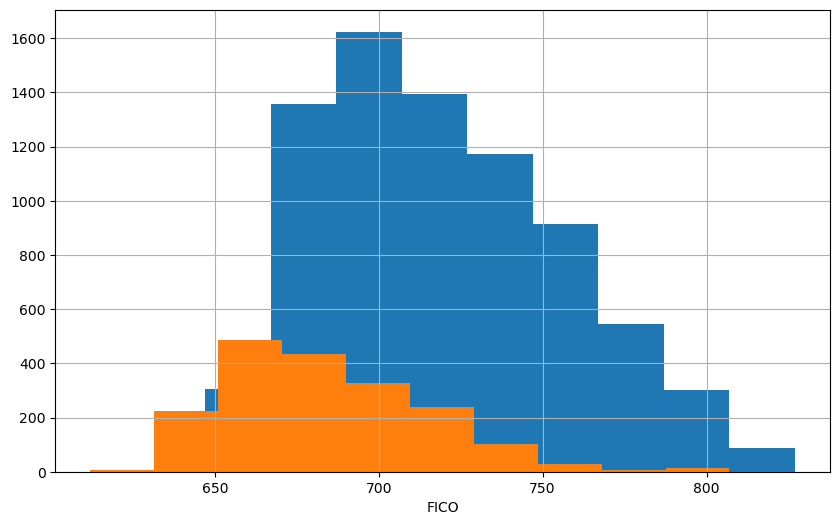

In [9]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist()
df[df['credit.policy']==0]['fico'].hist()
plt.xlabel('FICO')

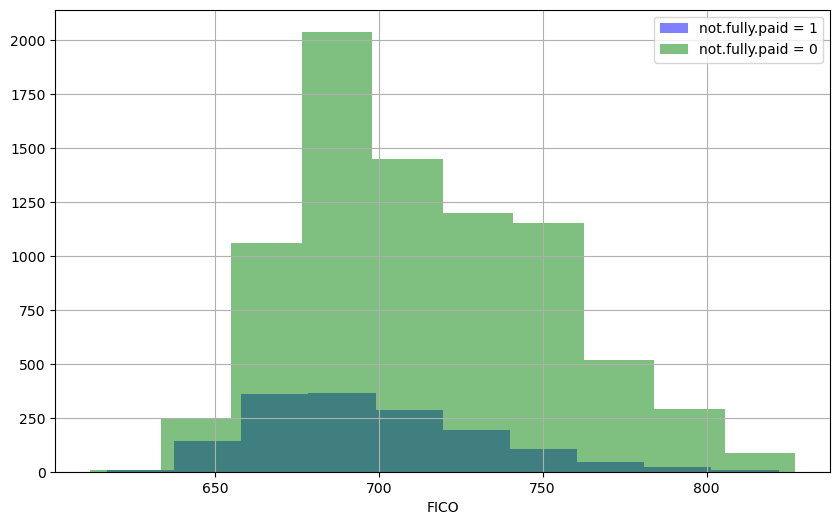

In [10]:
plt.figure(figsize=(10, 6))

df[df['not.fully.paid'] == 1]['fico'].hist(label='not.fully.paid = 1', color='blue', alpha=0.5)
df[df['not.fully.paid'] == 0]['fico'].hist(label='not.fully.paid = 0', color='green', alpha=0.5)

plt.xlabel('FICO')
plt.legend()
plt.show()

<Axes: xlabel='purpose', ylabel='count'>

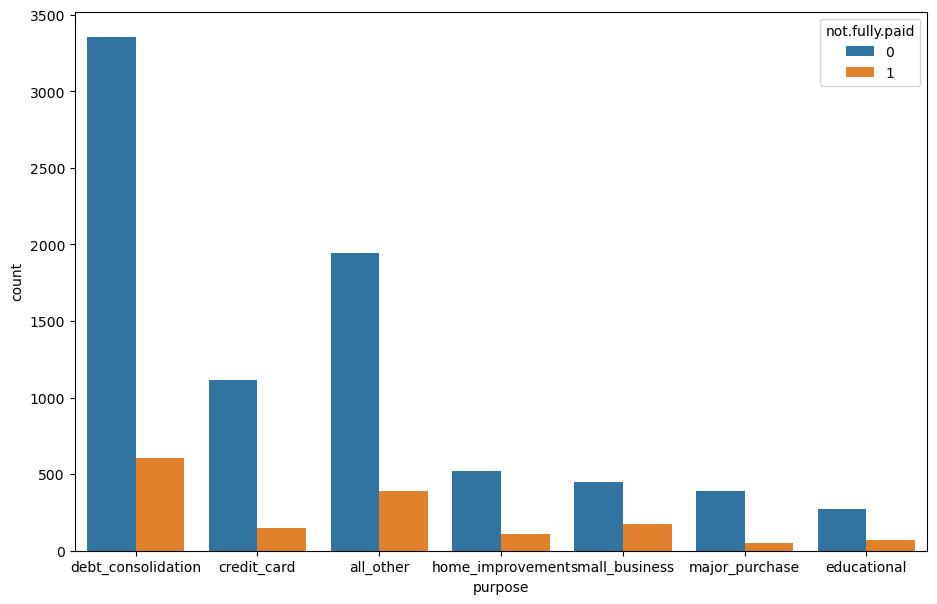

In [11]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',data=df,hue='not.fully.paid')

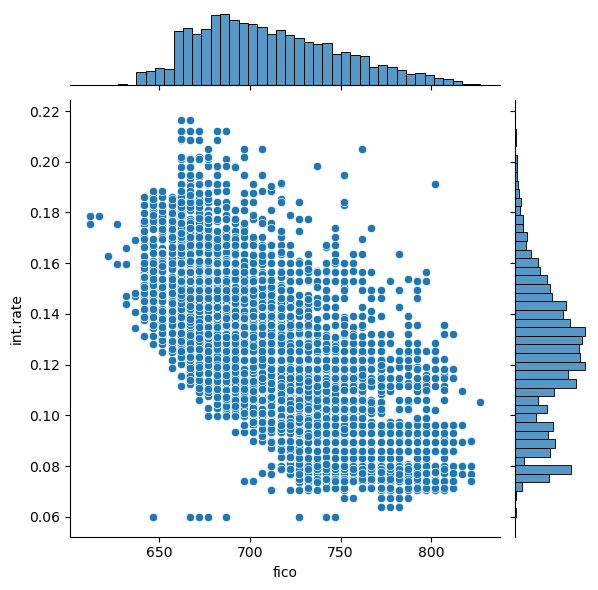

In [12]:
sns.jointplot(x='fico',y='int.rate',data=df)

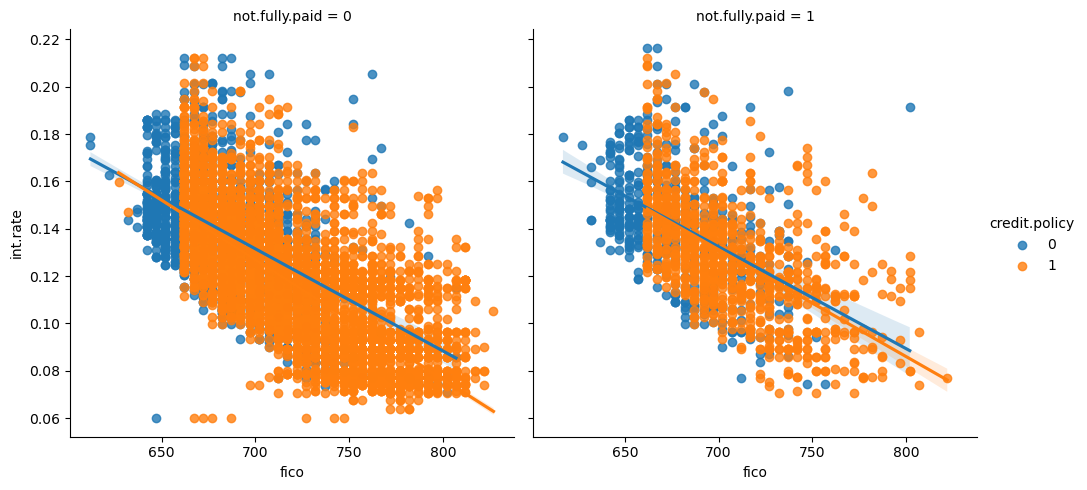

In [14]:
sns.lmplot(x='fico', y='int.rate', hue='credit.policy', data=df,col='not.fully.paid')
plt.xlabel('fico')
plt.ylabel('int.rate')
plt.show()

In [15]:
final_data = pd.get_dummies(df,columns=['purpose'],drop_first=True)

In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [17]:
from sklearn.model_selection import train_test_split
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2650
           1       0.21      0.22      0.21       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.74      0.74      3161



In [21]:
print(confusion_matrix(y_test,predictions))

[[2231  419]
 [ 399  112]]


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rand_tree=RandomForestClassifier()
rand_tree.fit(X_train,y_train)
predictions = rand_tree.predict(X_test)

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2650
           1       0.33      0.02      0.03       511

    accuracy                           0.84      3161
   macro avg       0.59      0.50      0.47      3161
weighted avg       0.76      0.84      0.77      3161



In [25]:
print(confusion_matrix(y_test,predictions))

[[2634   16]
 [ 503    8]]
